<h1>Importing Libraries</h1>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

<h1>Loading Data</h1>

In [ ]:
data = pd.read_csv("btptablr.csv")

In [ ]:
data.head()

,load,stress,discharge,charge,capacity
0,3,5.175,3.433,4.173,2.475
1,3,5.233,3.437,4.172,2.478
2,3,5.283,3.430,4.176,2.480
3,3,5.312,3.435,4.177,2.477
4,3,5.358,3.434,4.175,2.468


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   load       413 non-null    int64  
 1   stress     413 non-null    float64
 2   discharge  413 non-null    float64
 3   charge     413 non-null    float64
 4   capacity   413 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 16.3 KB


In [ ]:
data.describe()

,load,stress,discharge,charge,capacity
count,413.000000,413.000000,413.000000,413.000000,413.000000
mean,6.196126,8.466172,3.428385,4.180809,2.496254
std,2.397973,1.970751,0.005383,0.002620,0.036891
min,3.000000,5.175000,3.415000,4.169000,2.403000
25%,3.000000,5.892000,3.424000,4.179000,2.472000
50%,6.000000,8.476000,3.427000,4.181000,2.501000
75%,9.000000,10.612000,3.433000,4.182000,2.523000
max,9.000000,10.855000,3.442000,4.199000,2.580000


In [ ]:
data.isnull().sum()

load         0
stress       0
discharge    0
charge       0
capacity     0
dtype: int64

In [ ]:
data.load.unique()

array([3, 6, 9])

## **bold text**<h3>Data labels we are having are not unique or discrete so we will use regression model to train and test our data.</h3>

<h1>Data Correlation</h1>

In [ ]:
data.corr(method="pearson")

,load,stress,discharge,charge,capacity
load,1.000000,0.997131,0.112027,-0.410108,0.105698
stress,0.997131,1.000000,0.103106,-0.399021,0.101859
discharge,0.112027,0.103106,1.000000,-0.515872,-0.550140
charge,-0.410108,-0.399021,-0.515872,1.000000,0.194703
capacity,0.105698,0.101859,-0.550140,0.194703,1.000000


In [ ]:
data.corr(method="kendall")

,load,stress,discharge,charge,capacity
load,1.000000,0.817229,0.079266,-0.364900,0.081922
stress,0.817229,1.000000,0.045845,-0.267798,0.110308
discharge,0.079266,0.045845,1.000000,-0.482438,-0.403347
charge,-0.364900,-0.267798,-0.482438,1.000000,0.172178
capacity,0.081922,0.110308,-0.403347,0.172178,1.000000


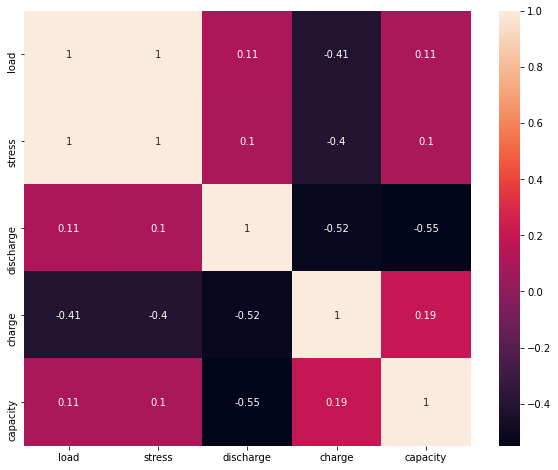

In [ ]:
f, ax=plt.subplots(figsize=(10,8))
corr = data.corr()
sns.heatmap(corr, ax=ax, annot = True)

<h1>Charge Analysis</h1>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


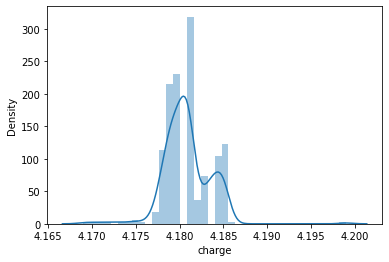

In [ ]:
ax = sns.distplot(data['charge'])

<h1>Stress Analysis</h1>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


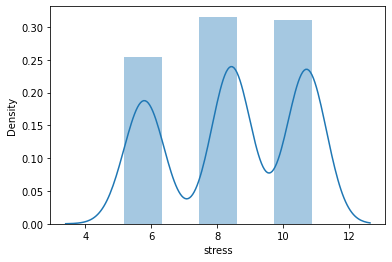

In [ ]:
ax = sns.distplot(data["stress"])

<h1>Splitting Data</h1>

In [ ]:
x = data.drop(data.columns[[4]], axis=1)
y=data['capacity']

In [ ]:
x.head()

,load,stress,discharge,charge
0,3,5.175,3.433,4.173
1,3,5.233,3.437,4.172
2,3,5.283,3.430,4.176
3,3,5.312,3.435,4.177
4,3,5.358,3.434,4.175


In [ ]:
#splitting into training and testing data
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state=0)

<h1>Feature Scaling</h1>

In [ ]:
from sklearn.preprocessing import MinMaxScaler

sc_x = MinMaxScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.fit_transform(xtest)

In [ ]:
xtrain[0:2]

array([[1.        , 0.99700704, 0.88888889, 0.5       ],
       [0.        , 0.08538732, 0.59259259, 0.92857143]])

<h1>ML Models</h1>

In [ ]:
linear = LinearRegression()
dt = DecisionTreeRegressor()
svr = svm.SVR()
rf = RandomForestRegressor()

In [ ]:
linear.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
dt.fit(xtrain, ytrain)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
svr.fit(xtrain, ytrain)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
rf.fit(xtrain, ytrain)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

<h1>Prediction</h1>

In [ ]:
y_pred_linear = linear.predict(xtest)
y_pred_dt = dt.predict(xtest)
y_pred_svr = svr.predict(xtest)
y_pred_rf = rf.predict(xtest)

<h1>RMSE error</h1>

In [ ]:
import math
error_linear = math.sqrt(mean_squared_error((y_pred_linear), ytest))
error_dt = math.sqrt(mean_squared_error((y_pred_dt), ytest))
error_svr = math.sqrt(mean_squared_error((y_pred_svr), ytest))
error_rf = math.sqrt(mean_squared_error((y_pred_rf), ytest))

In [ ]:
print("       Model      :   RMSE Error\n")
print("Linear Regression : ", error_linear)
print("Decision Tree     :  ", error_dt)
print("Support Vector    : ", error_svr)
print("Random Forest     : ", error_rf)

       Model      :   RMSE Error

Linear Regression :  0.03135016425094677
Decision Tree     :   0.03458083771902291
Support Vector    :  0.03410804060239953
Random Forest     :  0.030941058217907748


In [ ]:
y.shape , y_pred_linear.shape

((413,), (83,))

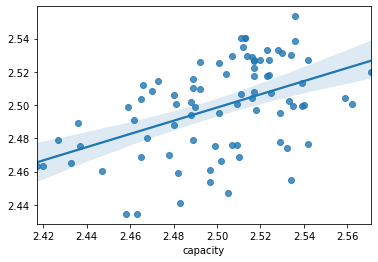

In [ ]:
sns.regplot(x = ytest , y = y_pred_linear )

In [ ]:
from sklearn.metrics import r2_score
print("R_2 linear" , r2_score(ytrain, linear.predict(xtrain)))
print("R_2 linear" , r2_score(ytrain, linear.predict(xtrain)))
print("R_2 linear" , r2_score(ytrain, linear.predict(xtrain)))
print("R_2 linear" , r2_score(ytrain, linear.predict(xtrain)))


R_2 linear 0.3777870305240463
R_2 linear 0.3777870305240463
R_2 linear 0.3777870305240463
R_2 linear 0.3777870305240463


In [ ]:
print("       Model      :   r_2 score\n")
print("Linear Regression : ", r2_score(ytrain, linear.predict(xtrain)))
print("Decision Tree     :  ", r2_score(ytrain, dt.predict(xtrain)))
print("Support Vector    : ", r2_score(ytrain, svr.predict(xtrain)))
print("Random Forest     : ", r2_score(ytrain, rf.predict(xtrain)))

       Model      :   r_2 score

Linear Regression :  0.3777870305240463
Decision Tree     :   0.9998594302186563
Support Vector    :  -0.008461455352893665
Random Forest     :  0.9864220913904405


In [ ]:
print("Linear Regression : ", r2_score(ytrain, linear.predict(xtrain)))
print("Decision Tree     :  ", r2_score(ytrain, dt.predict(xtrain)))
print("Support Vector    : ", r2_score(ytrain, svr.predict(xtrain)))
print("Random Forest     : ", r2_score(ytrain, rf.predict(xtrain)))

Linear Regression :  0.3777870305240463
Decision Tree     :   0.9998594302186563
Support Vector    :  -0.008461455352893665
Random Forest     :  0.9864220913904405


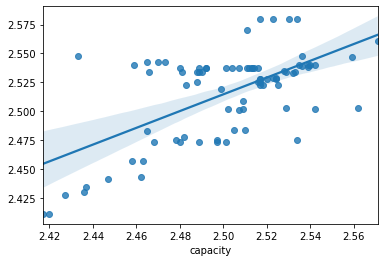

In [ ]:
sns.regplot(x = ytest , y = y_pred_dt)

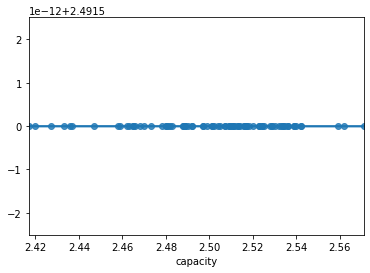

In [ ]:
sns.regplot(x = ytest , y = y_pred_svr)

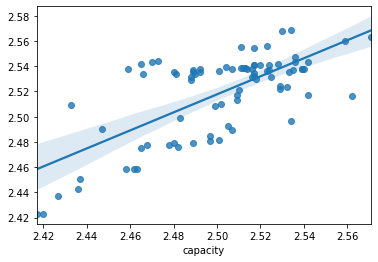

In [ ]:
sns.regplot(x = ytest , y = y_pred_rf )

In [ ]:
ytest.shape

(83,)

In [ ]:
xtest.shape

(83, 4)

In [ ]:
print(sum(abs(ytest-y_pred_rf))/83)

0.023203943775100714
